IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

READING THE DATA

In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


CHECKING MISSING VALUES 

In [4]:
#Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


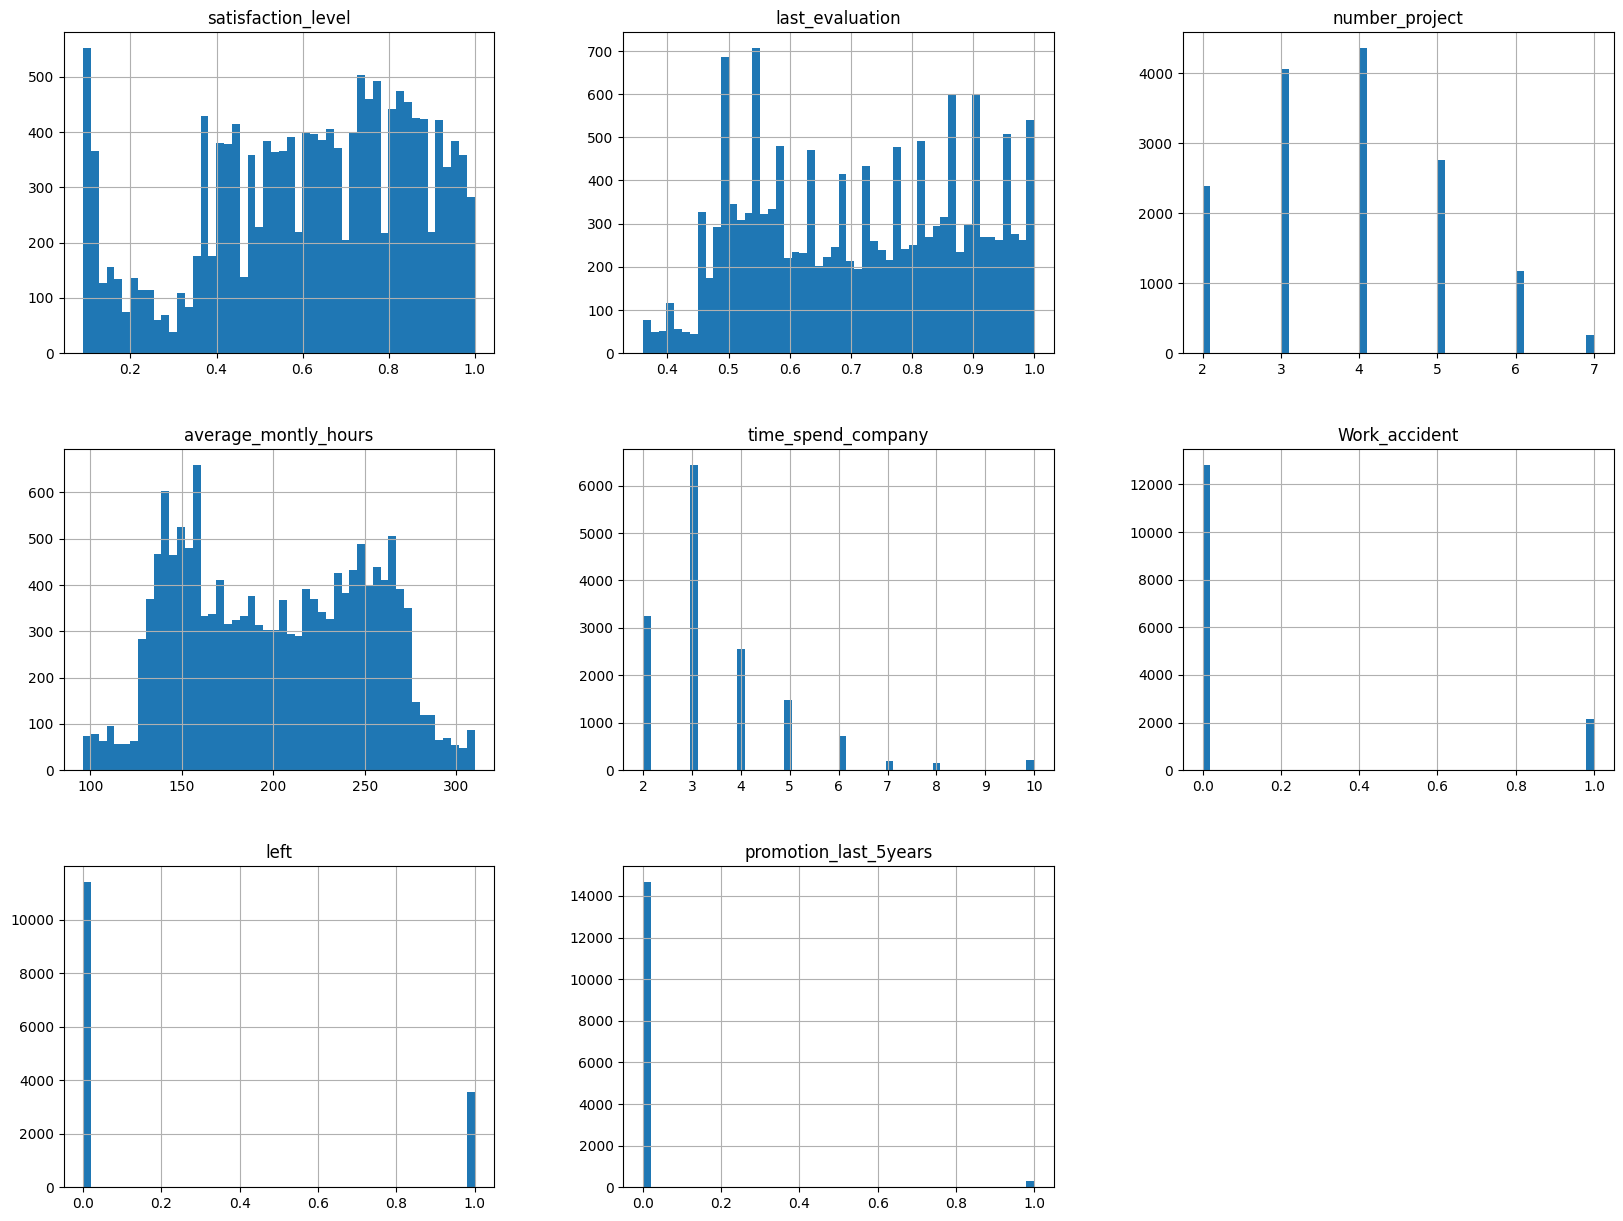

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
turnover_rate = df.left.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

CHECKING WHICH FEATURES HAVE THE MOST EFFECT ON TARGET VARIABLE

<AxesSubplot:>

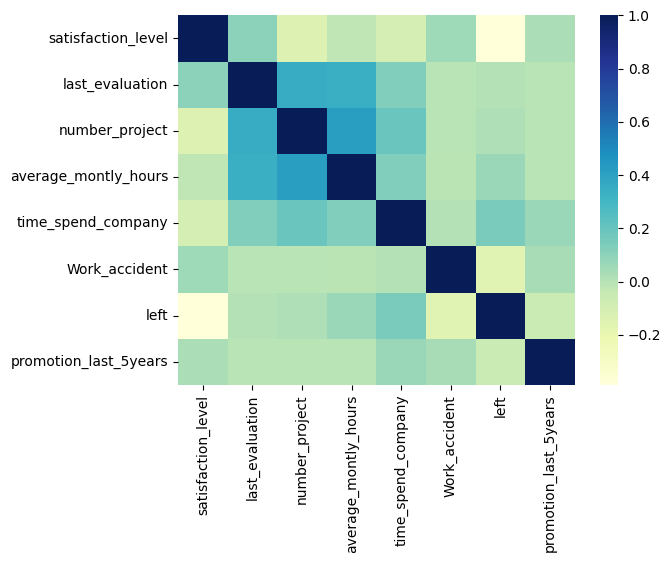

In [9]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap="YlGnBu")

In [10]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [11]:
df2=df[['last_evaluation', 'number_project', 'average_montly_hours', 'satisfaction_level']]

In [12]:
df2

,last_evaluation,number_project,average_montly_hours,satisfaction_level
0,0.53,2,157,0.38
1,0.86,5,262,0.80
2,0.88,7,272,0.11
3,0.87,5,223,0.72
4,0.52,2,159,0.37
...,...,...,...,...
14994,0.57,2,151,0.40
14995,0.48,2,160,0.37
14996,0.53,2,143,0.37
14997,0.96,6,280,0.11


SCALING THE DATA

In [13]:
scaler=StandardScaler()
df3=pd.DataFrame(scaler.fit_transform(df2))

In [14]:
df3.rename(columns={0: 'last_evaluation', 1: 'number_project', 2:'average_monthly_hours', 3:'satisfaction_level'}, inplace=True)

In [15]:
df3

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
0,-1.087275,-1.462863,-0.882040,-0.936495
1,0.840707,0.971113,1.220423,0.752814
2,0.957554,2.593763,1.420657,-2.022479
3,0.899131,0.971113,0.439508,0.431041
4,-1.145699,-1.462863,-0.841993,-0.976716
...,...,...,...,...
14994,-0.853580,-1.462863,-1.002181,-0.856051
14995,-1.379394,-1.462863,-0.821970,-0.976716
14996,-1.087275,-1.462863,-1.162368,-0.976716
14997,1.424944,1.782438,1.580845,-2.022479


In [16]:
df3['left']=df['left']

In [17]:
df3

,last_evaluation,number_project,average_monthly_hours,satisfaction_level,left
0,-1.087275,-1.462863,-0.882040,-0.936495,1
1,0.840707,0.971113,1.220423,0.752814,1
2,0.957554,2.593763,1.420657,-2.022479,1
3,0.899131,0.971113,0.439508,0.431041,1
4,-1.145699,-1.462863,-0.841993,-0.976716,1
...,...,...,...,...,...
14994,-0.853580,-1.462863,-1.002181,-0.856051,1
14995,-1.379394,-1.462863,-0.821970,-0.976716,1
14996,-1.087275,-1.462863,-1.162368,-0.976716,1
14997,1.424944,1.782438,1.580845,-2.022479,1


SPLITTING THE DATA INTO TRAIN AND TEST

In [18]:
train_set, test_set = train_test_split(df3, test_size=0.2, random_state=42, shuffle=True)

TRAIN DATA

In [19]:
train_set

,last_evaluation,number_project,average_monthly_hours,satisfaction_level,left
9838,-0.619886,-0.651538,-0.261313,1.557247,0
7689,0.373317,0.159788,-0.101125,-1.821371,0
6557,0.490165,-0.651538,-0.521618,0.752814,0
6872,0.840707,0.159788,-1.783095,0.189711,0
820,1.249673,2.593763,1.660939,-2.022479,1
...,...,...,...,...,...
5191,1.424944,0.159788,0.900048,-0.373392,0
13418,-0.386191,0.159788,0.639743,-0.494057,0
5390,0.081199,0.971113,0.960118,0.189711,0
860,1.658639,0.159788,0.339391,0.712593,1


In [20]:
turnover_rate = train_set.left.value_counts() / len(train_set)
turnover_rate

0    0.76123
1    0.23877
Name: left, dtype: float64

In [21]:
turnover_rate = test_set.left.value_counts() / len(test_set)
turnover_rate

0    0.764667
1    0.235333
Name: left, dtype: float64

TEST DATA

In [22]:
test_set

,last_evaluation,number_project,average_monthly_hours,satisfaction_level,left
6723,1.424944,0.971113,0.499578,0.149490,0
6473,0.490165,-0.651538,-0.701829,1.074587,0
4679,1.541791,-0.651538,0.259297,0.310376,0
862,-1.437818,-1.462863,-0.942110,-0.815830,1
7286,0.256470,0.971113,1.060235,1.034366,0
...,...,...,...,...,...
3297,0.139622,-1.462863,-1.162368,-0.011397,0
14113,1.015978,-0.651538,1.080259,1.275696,0
5514,-0.619886,-0.651538,-0.161196,0.672371,0
9939,0.256470,-1.462863,1.540798,1.114809,0


In [23]:
X=train_set.loc[:, 'last_evaluation':'satisfaction_level']
X

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
9838,-0.619886,-0.651538,-0.261313,1.557247
7689,0.373317,0.159788,-0.101125,-1.821371
6557,0.490165,-0.651538,-0.521618,0.752814
6872,0.840707,0.159788,-1.783095,0.189711
820,1.249673,2.593763,1.660939,-2.022479
...,...,...,...,...
5191,1.424944,0.159788,0.900048,-0.373392
13418,-0.386191,0.159788,0.639743,-0.494057
5390,0.081199,0.971113,0.960118,0.189711
860,1.658639,0.159788,0.339391,0.712593


In [24]:
y=train_set.loc[:, 'left']
y

9838     0
7689     0
6557     0
6872     0
820      1
        ..
5191     0
13418    0
5390     0
860      1
7270     0
Name: left, Length: 11999, dtype: int64

LOGISTIC REGRESSION

In [25]:
classifier=linear_model.LogisticRegression()
classifier.fit(X, y)

LogisticRegression()

In [26]:
A=test_set.loc[:, 'last_evaluation':'satisfaction_level']
A

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
6723,1.424944,0.971113,0.499578,0.149490
6473,0.490165,-0.651538,-0.701829,1.074587
4679,1.541791,-0.651538,0.259297,0.310376
862,-1.437818,-1.462863,-0.942110,-0.815830
7286,0.256470,0.971113,1.060235,1.034366
...,...,...,...,...
3297,0.139622,-1.462863,-1.162368,-0.011397
14113,1.015978,-0.651538,1.080259,1.275696
5514,-0.619886,-0.651538,-0.161196,0.672371
9939,0.256470,-1.462863,1.540798,1.114809


In [27]:
b=test_set.loc[:, 'left']
b

6723     0
6473     0
4679     0
862      1
7286     0
        ..
3297     0
14113    0
5514     0
9939     0
14346    1
Name: left, Length: 3000, dtype: int64

In [28]:
predictedclass=classifier.predict_proba(A)
predictedclass

array([[0.82578379, 0.17421621],
       [0.91982977, 0.08017023],
       [0.77775496, 0.22224504],
       ...,
       [0.88522717, 0.11477283],
       [0.847943  , 0.152057  ],
       [0.76399777, 0.23600223]])

In [29]:
l=[]
for i in predictedclass:
    if(i[1]>=0.5):
        l.append(1)
    else:
        l.append(0)

In [30]:
total=0
correct=0
for i in range(len(l)):
  if(l[i]==b.iloc[i]):
    correct+=1
  total+=1

accuracy=(correct/total)*100
accuracy

76.66666666666667

In [31]:
from sklearn.metrics import classification_report
print(classification_report(b, classifier.predict(A)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.51      0.23      0.32       706

    accuracy                           0.77      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000

